In [1]:
import pandas as pd

# Veriyi oku
df = pd.read_csv("USvideos.csv", encoding='latin1')

# İlk satırlara bak
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df = df[['title', 'description', 'tags']].dropna().drop_duplicates()

# Bazı açıklamalar boş veya '[none]' olabiliyor, temizleyelim
df = df[df['description'].str.lower() != 'none']
df = df[df['tags'].str.lower() != '[none]']


In [5]:
# Başlık + açıklama + etiketleri tek metin haline getirelim
df['text'] = df['title'] + " " + df['description'] + " " + df['tags']


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF ile metinleri sayısallaştır
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text'])

# Cosine similarity matrisi
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [11]:
def recommend(title, cosine_sim=cosine_sim):
    matches = indices[indices.index == title]
    if matches.empty:
        print("⚠️ Başlık bulunamadı.")
        return pd.DataFrame()

    idx = matches.iloc[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    video_indices = [i[0] for i in sim_scores]
    return df[['title', 'description']].iloc[video_indices]


In [12]:
recommend("WE WANT TO TALK ABOUT OUR MARRIAGE")


,title,description
217,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANTELL'S CHANNEL - https://www.youtube.com/s...
5804,ALL TIME GREATEST AIRPLANE SEAT - Emirates Fir...,MY DOPE MERCH - https://shopcaseyneistat.com/\...
3421,IS THIS THE CAMERA OF THE FUTURE?,RYLO Camera (this is not an endorsement or sug...
3276,How to DRAW ON COFFEE STAINS EP. 5!!!,FACEBOOK- https://tinyurl.com/yaxtnnd5\n\nINST...
23398,"$30,000.00 Camera",MIKES SHOP! : www.hookandstemco.etsy.com\nMIKE...


C:\Users\LGR\AppData\Local\Temp\ipykernel_26136\2482633613.py:17: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


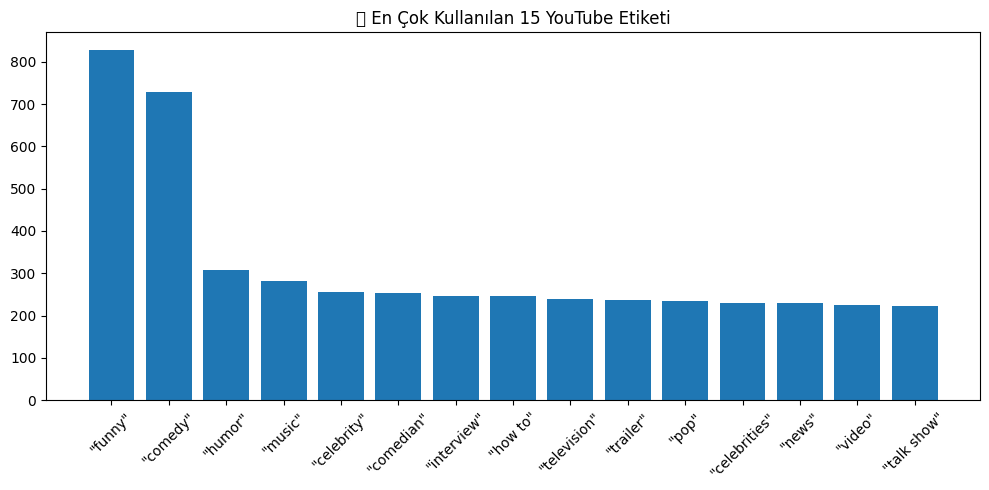

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

# Tüm etiketleri ayır (etiketler ; veya | ile ayrılmış olabilir)
tag_list = df['tags'].str.split('|').dropna().tolist()
flat_tags = [tag.strip().lower() for sublist in tag_list for tag in sublist]

# En sık geçen 15 etiket
tag_counts = Counter(flat_tags)
common_tags = dict(sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:15])

# Çiz
plt.figure(figsize=(10, 5))
plt.bar(common_tags.keys(), common_tags.values())
plt.title('🎯 En Çok Kullanılan 15 YouTube Etiketi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\LGR\AppData\Local\Temp\ipykernel_26136\700410481.py:21: UserWarning: Glyph 128226 (\N{PUBLIC ADDRESS LOUDSPEAKER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128226 (\N{PUBLIC ADDRESS LOUDSPEAKER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


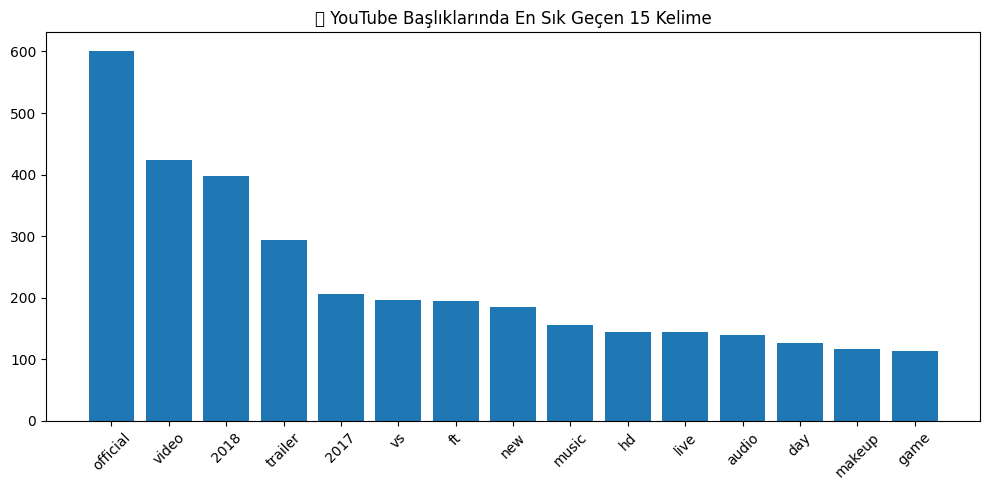

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Sadece başlıklar
titles = df['title'].dropna()

# Kelime sayımı (stop words dahil değil)
cv = CountVectorizer(stop_words='english')
word_matrix = cv.fit_transform(titles)
sum_words = word_matrix.sum(axis=0)

# Kelime-frekans çiftlerini al
word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:15]

# Görselleştir
words, freqs = zip(*word_freq)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title("📢 YouTube Başlıklarında En Sık Geçen 15 Kelime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
